# Machine Learning - Assignment 9 - Neural Network

In [20]:
import pandas as pd
import numpy as np
from random import randint
from math import exp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) #(1-sample_digits[i].reshape((16, 16)))/2*255
        plt.imshow(img, cmap='gray')
        plt.axis('off')

## (a) Optimize width (the number of neurons in a hidden layer; it is usually the same for all of them) and depth of the network. Try to find a setting that trains in a reasonable time. Plot the loss.

In [21]:
'''
sigmoid function and its derivative
'''
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def sigmoid_derivative(x):
    return (sigmoid(x) * (1 - sigmoid(x)))

In [65]:
class NeuralNetwork():
    def __init__(self, X_train, y_train, size):
        size.insert(0,X_train.shape[1])
        self.size = size
        self.layers = len(self.size)
        self.X_train, self.y_train = X_train, y_train
 
        self.weights = []
        
        for i in range(self.layers-1):
            self.weights.append(np.random.randn(self.size[i],self.size[i+1]))
        self.success_rates = []
            
    '''
    calculate f(x) and f'(x) and store them temporily
    '''
    def feed_forward(self, data):
        sigmoid_v = sigmoid
        sigmoid_d_v = sigmoid_derivative
        
        self.sigmoid_results = [data]
        self.sigmoid_d_results = []
        
        for i in range(self.layers-1):
            self.sigmoid_results.append([])
            self.sigmoid_d_results.append([])
        
        for layer in range(self.layers - 1):
            for row in range(data.shape[0]):
                product = np.dot(self.sigmoid_results[layer][row], self.weights[layer])
                self.sigmoid_results[layer + 1].append(sigmoid_v(product))
                self.sigmoid_d_results[layer].append(sigmoid_d_v(product))
                
    def error_derivative(self):
        self.errors = np.array(self.sigmoid_results[-1]) - self.y_train
        
    def backprop(self):
        self.deltas = []
        
        for layer in range(self.layers - 1):
            self.deltas.append([])        
        
        for row in range(self.X_train.shape[0]):
            d = np.diag(self.sigmoid_d_results[-1][row])
            err = self.errors[row].reshape(self.errors.shape[1], 1)
            delta = np.dot(d,err)
            self.deltas[0].append(delta)
            
            for x in range(self.layers-2):
                d_i = -(x+2)
                w_i = -(x+1)
                d = np.diag(self.sigmoid_d_results[d_i][row])
                w = self.weights[w_i]
                delta_i = self.deltas[x][row]
                delta = np.dot(np.dot(d,w), delta_i)
                self.deltas[x+1].append(delta)
            
    def correct(self, gamma):
        for row in range(self.X_train.shape[0]):
            for x in range(self.layers-1):
                d = self.deltas[x][row].T
                o_i = -(x+2)
                wt_i = -(x+1)
                o = self.sigmoid_results[o_i][row].reshape(self.sigmoid_results[o_i][row].shape[0], 1)
                Delta = -gamma * np.dot(o,d)
                self.weights[wt_i] = self.weights[wt_i] + Delta
            
    def check_class(self):
        self.class_check = np.zeros((self.y_train.shape))
        for row in range(self.y_train.shape[0]):
            self.class_check[row,int(self.sigmoid_results[-1][row].argmax())] += 1
            
    def accuracy_check(self):
        total = self.y_train.shape[0]
        correct = 0
        for row in range(total):
            if np.array_equal(self.y_train[row], self.class_check[row]):
                correct += 1
        return (correct / total)
    
    def train(self,iterations=100, gamma=0.05, printfreq=25):
        for iteration in range(iterations):
            self.feed_forward(self.X_train)
            self.check_class()
            if iteration % printfreq == 0 or iteration == iterations - 1:
                print("Iteration {} | Accuracy: {}".format(iteration,self.accuracy_check()))
            self.success_rates.append(self.accuracy_check())
            self.error_derivative()
            self.backprop()
            self.correct(gamma)
            
    def predict(self,X_test,y_test):
        self.X_test, self.y_test = X_test, y_test
        self.feed_forward(self.X_test)
        predictions = []
        
        for row in range(self.X_test.shape[0]):
            predictions.append(int(self.sigmoid_results[-1][row].argmax()))
        self.pred_array = np.array(predictions)
        
    def error_rate(self):
        bools = np.equal(self.pred_array, self.y_test.flatten())
        correct = np.sum(bools)
        return (self.y_test.shape[0] - correct) / self.y_test.shape[0]

In [53]:
trainset = np.loadtxt('./Data/zip.train')

constant_coefficient = np.ones((trainset.shape[0],1))
X_train = np.concatenate((trainset[:,1:], constant_coefficient),axis=-1)

In [54]:
y_train = np.zeros((trainset.shape[0],10))
for i in range(trainset.shape[0]):
    y_train[i,int(trainset[i,0])] += 1

### Comments: both processes of training model take pretty much time... Especially the second one takes me at home ~36min to finish. You can check the result in pdf :)

In [71]:
nn = NeuralNetwork(X_train, y_train, [10,10])
nn.train(gamma = 0.0008)

Iteration 0 | Accuracy: 0.07955013029762721
Iteration 25 | Accuracy: 0.25058291043752573
Iteration 50 | Accuracy: 0.4105061034151694
Iteration 75 | Accuracy: 0.47894664655054175
Iteration 99 | Accuracy: 0.5343574269647511


In [26]:
nn2 = NeuralNetwork(X_train, y_train, [100,50,10])
nn2.train(iterations = 500,gamma = 0.001)

Iteration 0 | Accuracy: 0.08174461665066521
Iteration 25 | Accuracy: 0.30325058291043755
Iteration 50 | Accuracy: 0.3656562885749554
Iteration 75 | Accuracy: 0.4068029076944178
Iteration 100 | Accuracy: 0.4594705801673296
Iteration 125 | Accuracy: 0.4733232752708819
Iteration 150 | Accuracy: 0.4943080510218077
Iteration 175 | Accuracy: 0.5362776025236593
Iteration 200 | Accuracy: 0.5842819914963654
Iteration 225 | Accuracy: 0.5993690851735016
Iteration 250 | Accuracy: 0.6103415169386915
Iteration 275 | Accuracy: 0.6217254148950762
Iteration 300 | Accuracy: 0.6571115073378138
Iteration 325 | Accuracy: 0.6894801810451241
Iteration 350 | Accuracy: 0.7657385818131943
Iteration 375 | Accuracy: 0.8343162803456317
Iteration 400 | Accuracy: 0.8625702921409958
Iteration 425 | Accuracy: 0.8945274996571115
Iteration 450 | Accuracy: 0.9100260595254424
Iteration 475 | Accuracy: 0.9182553833493348
Iteration 499 | Accuracy: 0.9268961733644219


In [27]:
testset = np.loadtxt('./Data/zip.test')
constant_coefficient = np.ones((testset.shape[0],1))
X_test = np.concatenate((testset[:,1:],constant_coefficient),axis=-1)
y_test = testset[:,0]

In [30]:
X_test.shape

(2007, 257)

In [31]:
y_test.shape

(2007,)

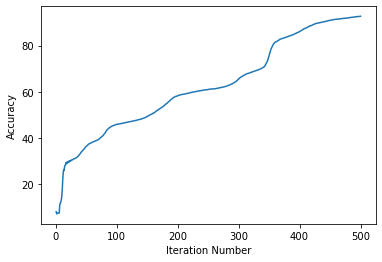

In [70]:
x = list(range(1,501))
y = list(map((lambda x: x*100), nn2.success_rates))
plt.xlabel("Iteration Number")
plt.ylabel("Accuracy")
plt.plot(x, y)

## (b) Show some digits that are classified incorrectly

In [64]:
np.mean(nn2.pred_array==y_test)

0.8480318883906328

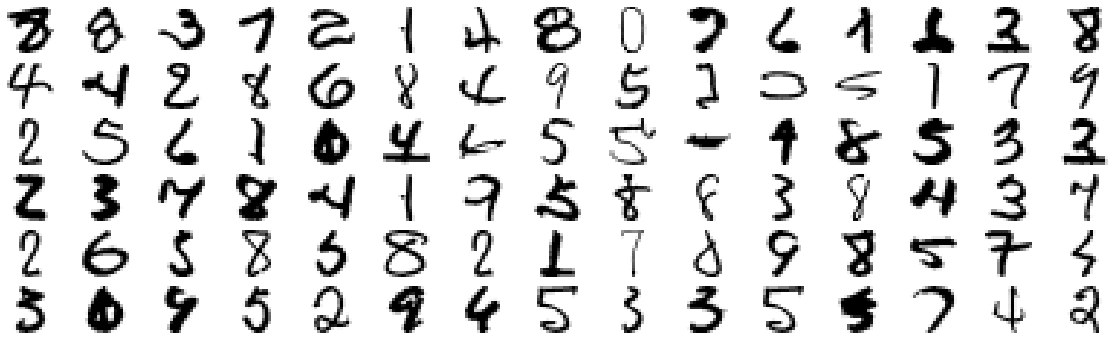

In [62]:
indices = np.where(nn2.pred_array != test_labels)
show_numbers(X_test[indices])

## (c) Plot your first weight layer as a grayscale image

(-0.5, 98.5, 256.5, -0.5)

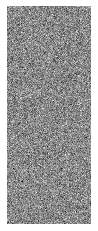

In [63]:
first_layer = np.array(nn2.weights[0][:,1:])
plt.imshow(first_layer, cmap='gray')
plt.axis('off')